In [1]:
import pandas as pd
import numpy as np

# === Load the data ===
file_path = '/Users/touqeergill/Desktop/10. DMPS + APS Hourly Avg (2010-2022).xlsx'
data = pd.read_excel(file_path)

print("Input Data Preview:")
print(data.head())
print("Columns:", data.columns)

# === Extract numeric Dp columns only (skip datetime) ===
diameter_cols = data.columns[1:]  # everything except the datetime column
Dp = np.array([float(x) for x in diameter_cols])  # convert column names to floats

# === Initialize arrays ===
dDp = np.zeros(len(Dp))

# Calculate dDp for each bin (geometric mean spacing)
dDp[1:-1] = np.sqrt(Dp[2:] * Dp[1:-1]) - np.sqrt(Dp[:-2] * Dp[1:-1])

# === Extract particle distribution data only ===
dNdlogDp_matrix = data[diameter_cols].to_numpy(dtype=float)

# === Vectorized calculation of Ni ===
Ni = np.zeros_like(dNdlogDp_matrix)
factor = np.log10(np.e) * dDp / Dp  # precompute bin-wise factor
Ni[:, 1:-1] = dNdlogDp_matrix[:, 1:-1] * factor[1:-1]

# === Build result DataFrame ===
Ni_df = pd.DataFrame(Ni, columns=diameter_cols, index=data.index)
Ni_df.insert(0, "datetime", data["datetime"])  # keep datetime column

print("\nCalculated Ni Data Preview:")
print(Ni_df.head())

# === Save to Excel ===
output_file_path = '/Users/touqeergill/Desktop/DMPS_APS_Hourly_Avg_Ni (2010-2022).xlsx'
Ni_df.to_excel(output_file_path, index=False)

print("\nSaved Ni results to:", output_file_path)

Input Data Preview:
             datetime   3.00E-09   3.61E-09   4.34E-09   5.22E-09   6.28E-09  \
0 2010-01-01 00:00:00   0.000000   0.000000   0.000000   0.000000  16.342779   
1 2010-01-01 01:00:00  51.512487   0.000000   0.000000   0.000000  16.879863   
2 2010-01-01 02:00:00   0.000000  32.791738   0.000000  21.797407  51.283823   
3 2010-01-01 03:00:00   0.000000   0.000000  24.871517   0.000000  17.158648   
4 2010-01-01 04:00:00   0.000000   0.000000  25.436777   0.000000  52.647008   

     7.56E-09    9.10E-09    1.09E-08    1.32E-08  ...  1.04E-05  1.11E-05  \
0   44.231368  142.697910  121.069086  221.440639  ...  0.000000  0.000000   
1   86.245160  155.063647  125.185892  258.969925  ...  0.001302  0.000000   
2   58.252384  156.180188  227.306696  267.244975  ...  0.000000  0.000000   
3  104.025507  100.157629  256.410087  298.585272  ...  0.000651  0.000000   
4   58.140192   85.621322  149.489983  318.040857  ...  0.001085  0.000542   

   1.20E-05  1.29E-05  1.38E-0

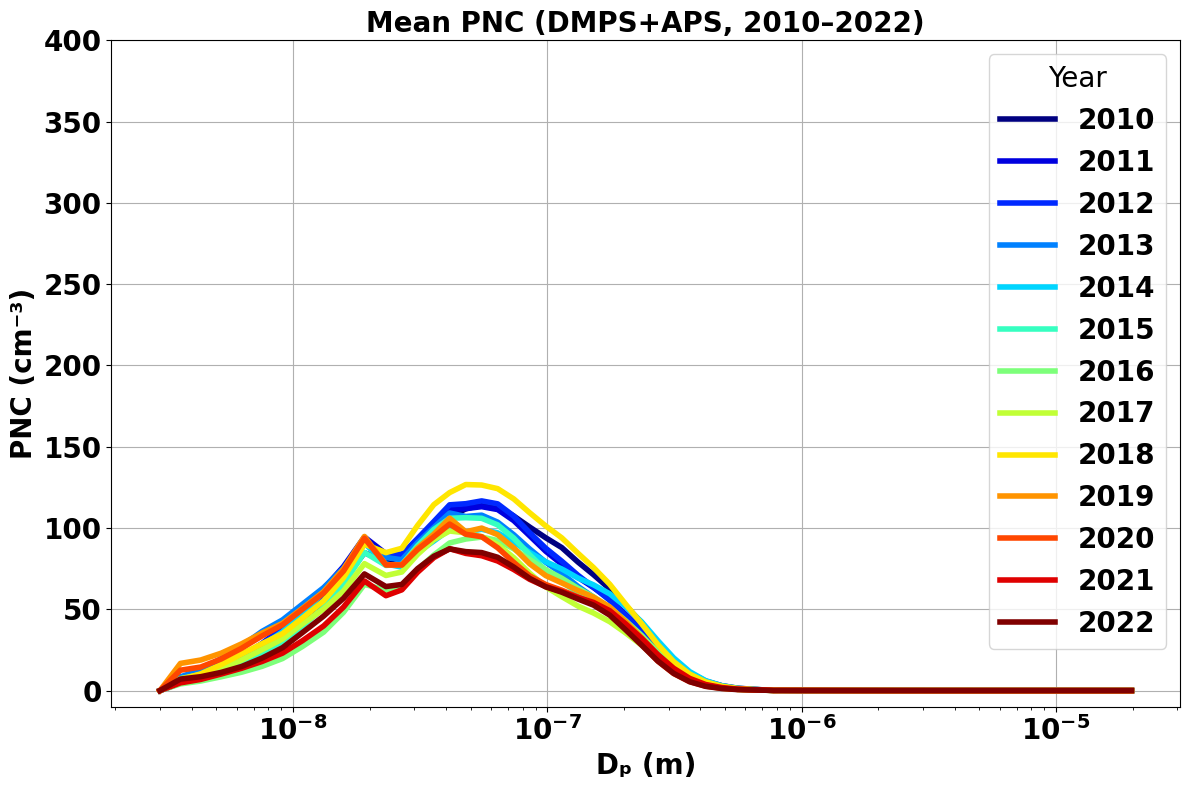

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_psd_by_years(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'Date' column is datetime type for easy manipulation
    data['datetime'] = pd.to_datetime(data['datetime'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'datetime' column
    diameters_float = [float(d) for d in diameters]

    # Filter data for years 2010 to 2022
    data = data[data['datetime'].dt.year.between(2010, 2022)]
    years = sorted(data['datetime'].dt.year.unique())

    # Prepare a figure
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

    # Plot data for each year using the mean
    for year, color in zip(years, colors):
        yearly_data = data[data['datetime'].dt.year == year]
        yearly_data = yearly_data.dropna(subset=diameters)
        mean_psd = yearly_data.iloc[:, 1:].mean()  # Use mean instead of sum
        
        ax.semilogx(diameters_float, mean_psd, linewidth=4, color=color, label=str(year))

    # Set plot titles and labels
    ax.set_title('Mean PNC (DMPS+APS, 2010–2022)', fontsize=20, weight='bold')
    ax.set_xlabel('Dₚ (m)', fontsize=20, weight='bold')
    ax.set_ylabel('PNC (cm⁻³)', fontsize=20, weight='bold')
    ax.set_ylim(y_min, y_max)
    ax.grid(True)
    legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
    for text in legend.get_texts():
        text.set_weight('bold')

    # Adjusting the tick labels and exponent notation
    ax.tick_params(axis='both', which='major', labelsize=20)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    # Set the offset text for scientific notation to be bold and size 20
    ax.xaxis.get_offset_text().set_fontsize(20)
    ax.xaxis.get_offset_text().set_weight('bold')
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.yaxis.get_offset_text().set_weight('bold')

    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Close the plot to free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/10. PNC (DMPS + APS (2010-2022).xlsx'
y_min = -10  # Set minimum y-axis value
y_max = 400 # Set maximum y-axis value

plot_psd_by_years(file_path, y_min, y_max)

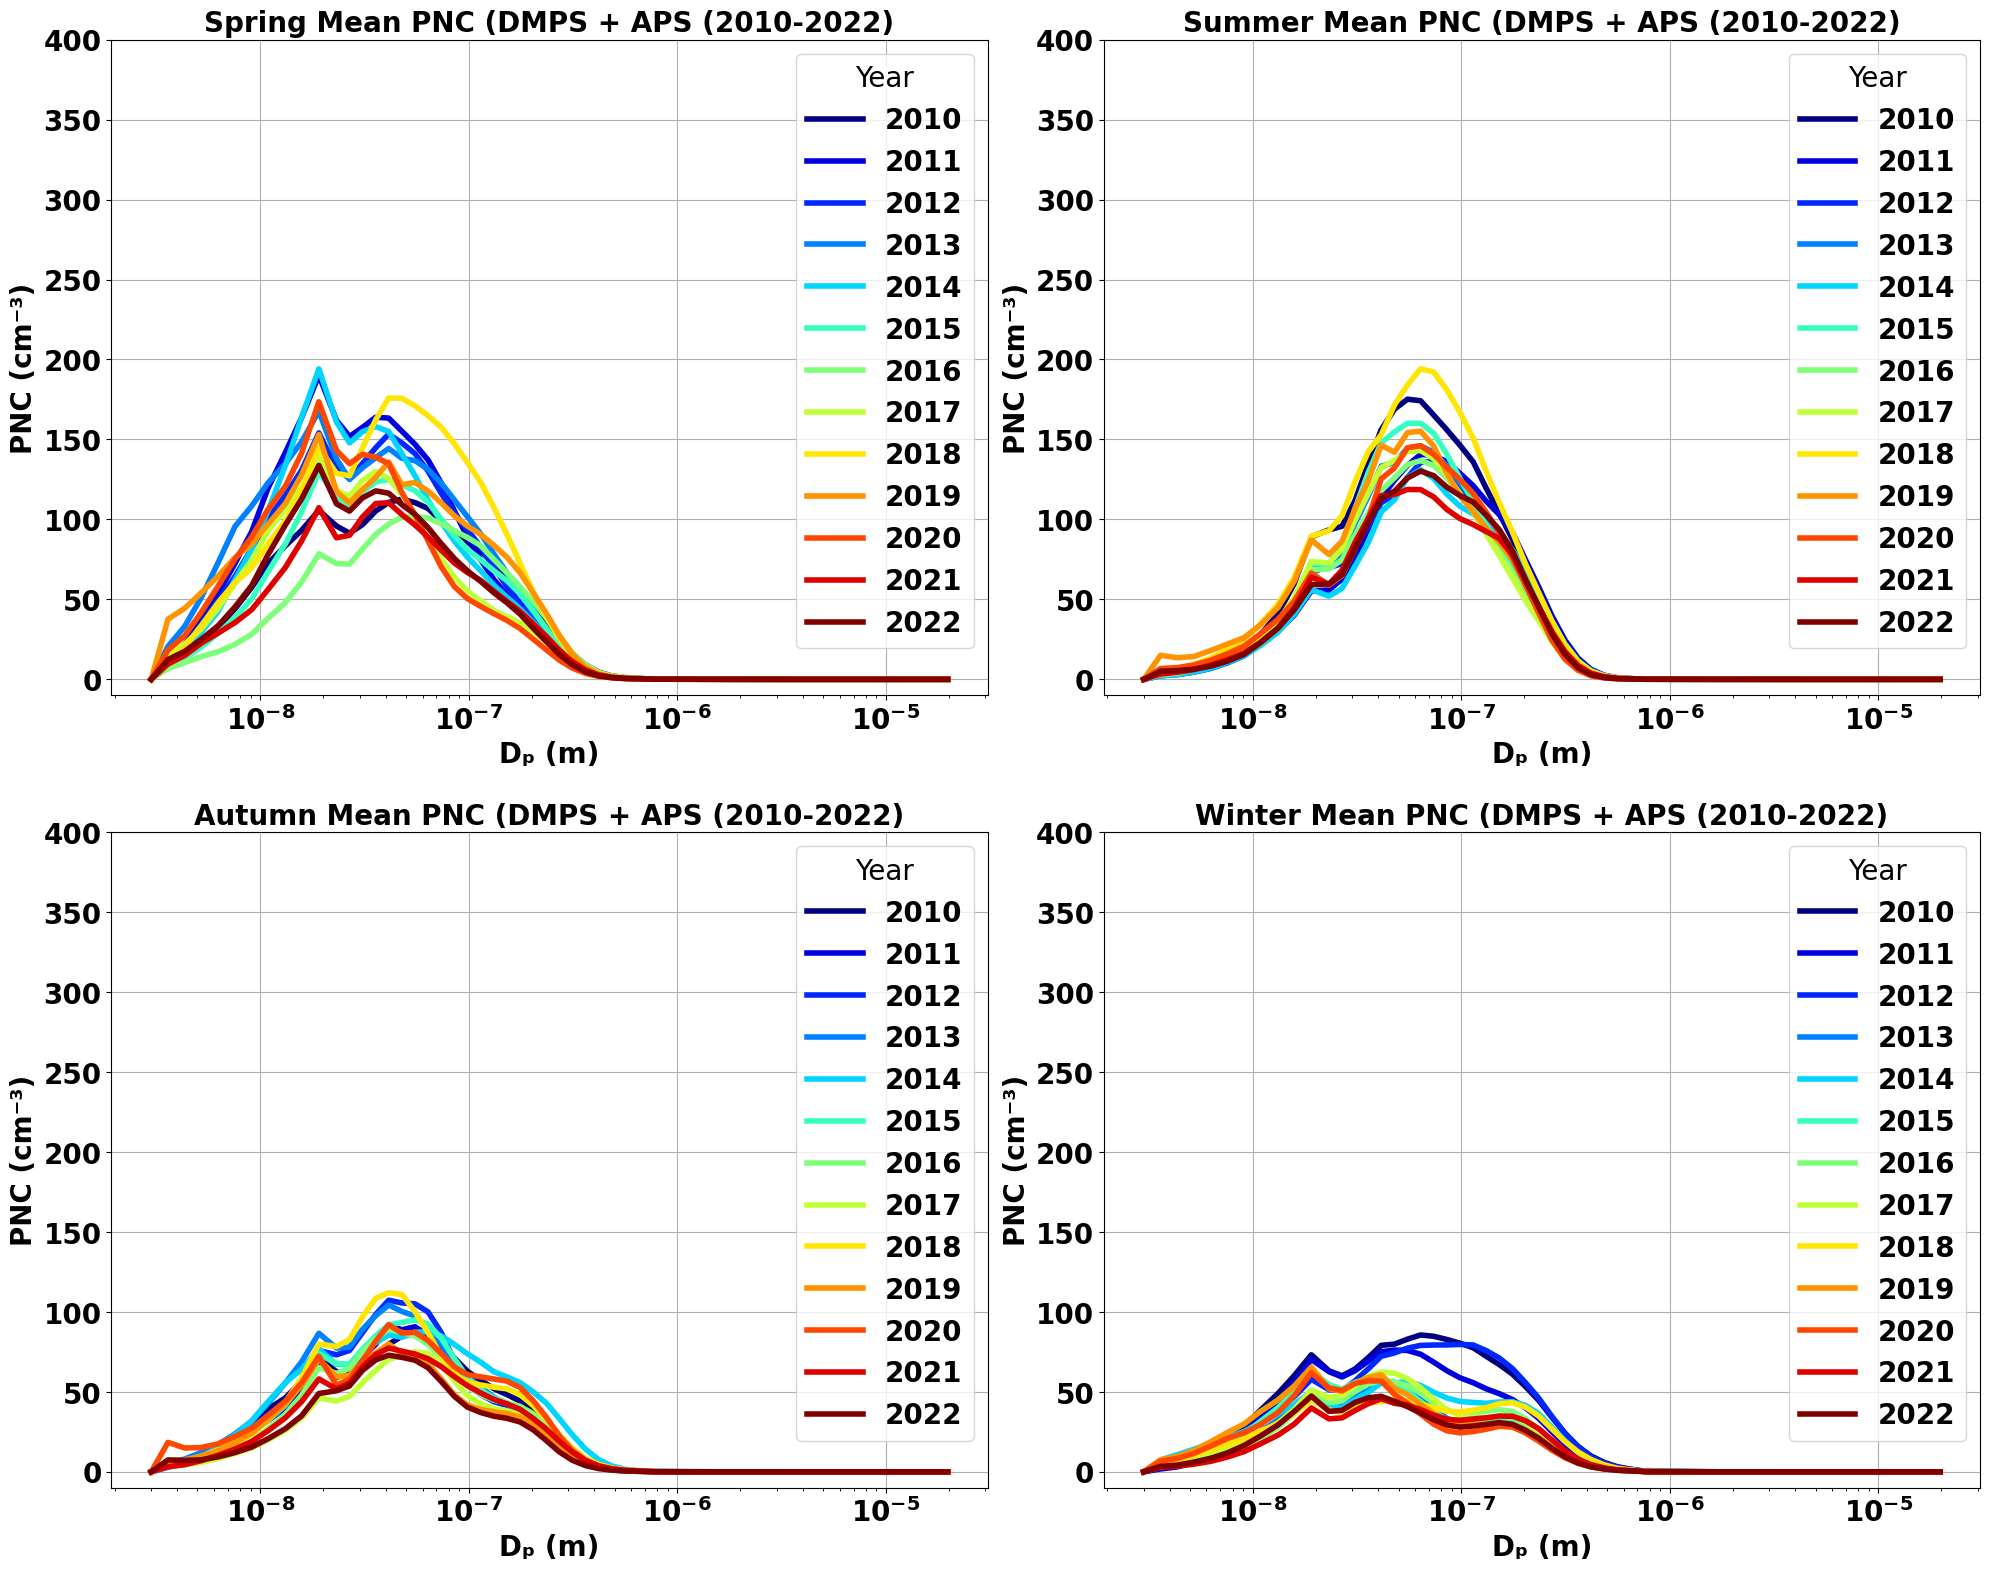

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_mean_psd_by_season(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'datetime' column is datetime type for easy manipulation
    data['datetime'] = pd.to_datetime(data['datetime'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'datetime' column
    diameters_float = [float(d) for d in diameters]

    # Define seasons
    seasons = {
        'Spring': (3, 4, 5),
        'Summer': (6, 7, 8),
        'Autumn': (9, 10, 11),
        'Winter': (12, 1, 2)
    }

    # Prepare a large figure to hold all subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration
    
    # Plot each season
    for i, (season, months) in enumerate(seasons.items()):
        season_data = data[data['datetime'].dt.month.isin(months) & data['datetime'].dt.year.between(2010, 2022)]
        years = sorted(season_data['datetime'].dt.year.unique())
        colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

        ax = axes[i]
        for year, color in zip(years, colors):
            yearly_data = season_data[season_data['datetime'].dt.year == year]
            yearly_data = yearly_data.dropna(subset=diameters)
            mean_psd = yearly_data.iloc[:, 1:].mean()

            # Plot mean PSD
            ax.semilogx(diameters_float, mean_psd, linewidth=4, color=color, label=str(year))

        # Set plot formatting
        ax.set_title(f'{season} Mean PNC (DMPS + APS (2010-2022)', fontsize=20, weight='bold')
        ax.set_xlabel('Dₚ (m)', fontsize=20, weight='bold')
        ax.set_ylabel('PNC (cm⁻³)', fontsize=20, weight='bold')
        ax.set_ylim(y_min, y_max)
        ax.grid(True)

        legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
        for text in legend.get_texts():
            text.set_weight('bold')

        ax.tick_params(axis='both', which='major', labelsize=20)
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight('bold')

        ax.xaxis.get_offset_text().set_fontsize(20)
        ax.xaxis.get_offset_text().set_weight('bold')
        ax.yaxis.get_offset_text().set_fontsize(20)
        ax.yaxis.get_offset_text().set_weight('bold')

    # Improve layout and display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/10. PNC Without 72 Pollen and dust events.xlsx'
y_min = -10   # Minimum y-axis value
y_max = 400  # Maximum y-axis value

plot_mean_psd_by_season(file_path, y_min, y_max)

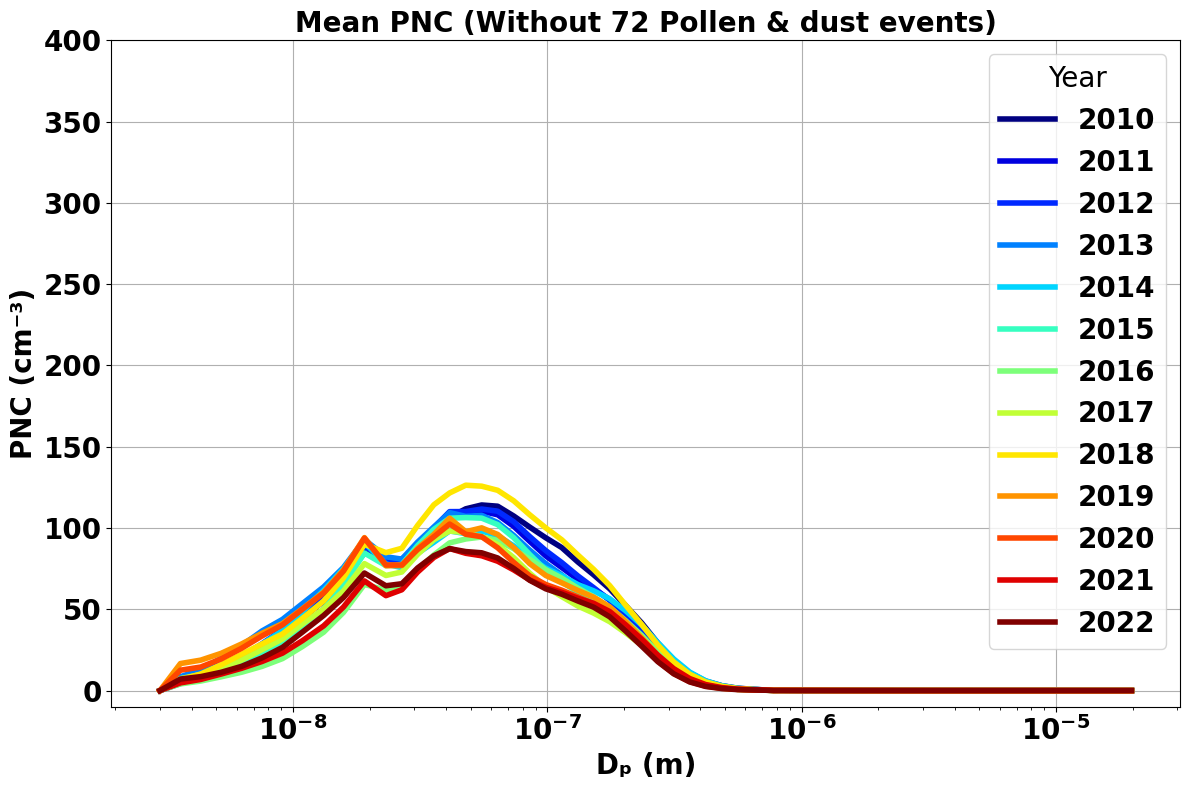

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_psd_by_years(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'Date' column is datetime type for easy manipulation
    data['datetime'] = pd.to_datetime(data['datetime'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'datetime' column
    diameters_float = [float(d) for d in diameters]

    # Filter data for years 2010 to 2022
    data = data[data['datetime'].dt.year.between(2010, 2022)]
    years = sorted(data['datetime'].dt.year.unique())

    # Prepare a figure
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

    # Plot data for each year using the mean
    for year, color in zip(years, colors):
        yearly_data = data[data['datetime'].dt.year == year]
        yearly_data = yearly_data.dropna(subset=diameters)
        mean_psd = yearly_data.iloc[:, 1:].mean()  # Use mean instead of sum
        
        ax.semilogx(diameters_float, mean_psd, linewidth=4, color=color, label=str(year))

    # Set plot titles and labels
    ax.set_title('Mean PNC (Without 72 Pollen & dust events)', fontsize=20, weight='bold')
    ax.set_xlabel('Dₚ (m)', fontsize=20, weight='bold')
    ax.set_ylabel('PNC (cm⁻³)', fontsize=20, weight='bold')
    ax.set_ylim(y_min, y_max)
    ax.grid(True)
    legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
    for text in legend.get_texts():
        text.set_weight('bold')

    # Adjusting the tick labels and exponent notation
    ax.tick_params(axis='both', which='major', labelsize=20)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    # Set the offset text for scientific notation to be bold and size 20
    ax.xaxis.get_offset_text().set_fontsize(20)
    ax.xaxis.get_offset_text().set_weight('bold')
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.yaxis.get_offset_text().set_weight('bold')

    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Close the plot to free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/10. PNC Without 72 Pollen and dust events.xlsx'
y_min = -10  # Set minimum y-axis value
y_max = 400 # Set maximum y-axis value

plot_psd_by_years(file_path, y_min, y_max)

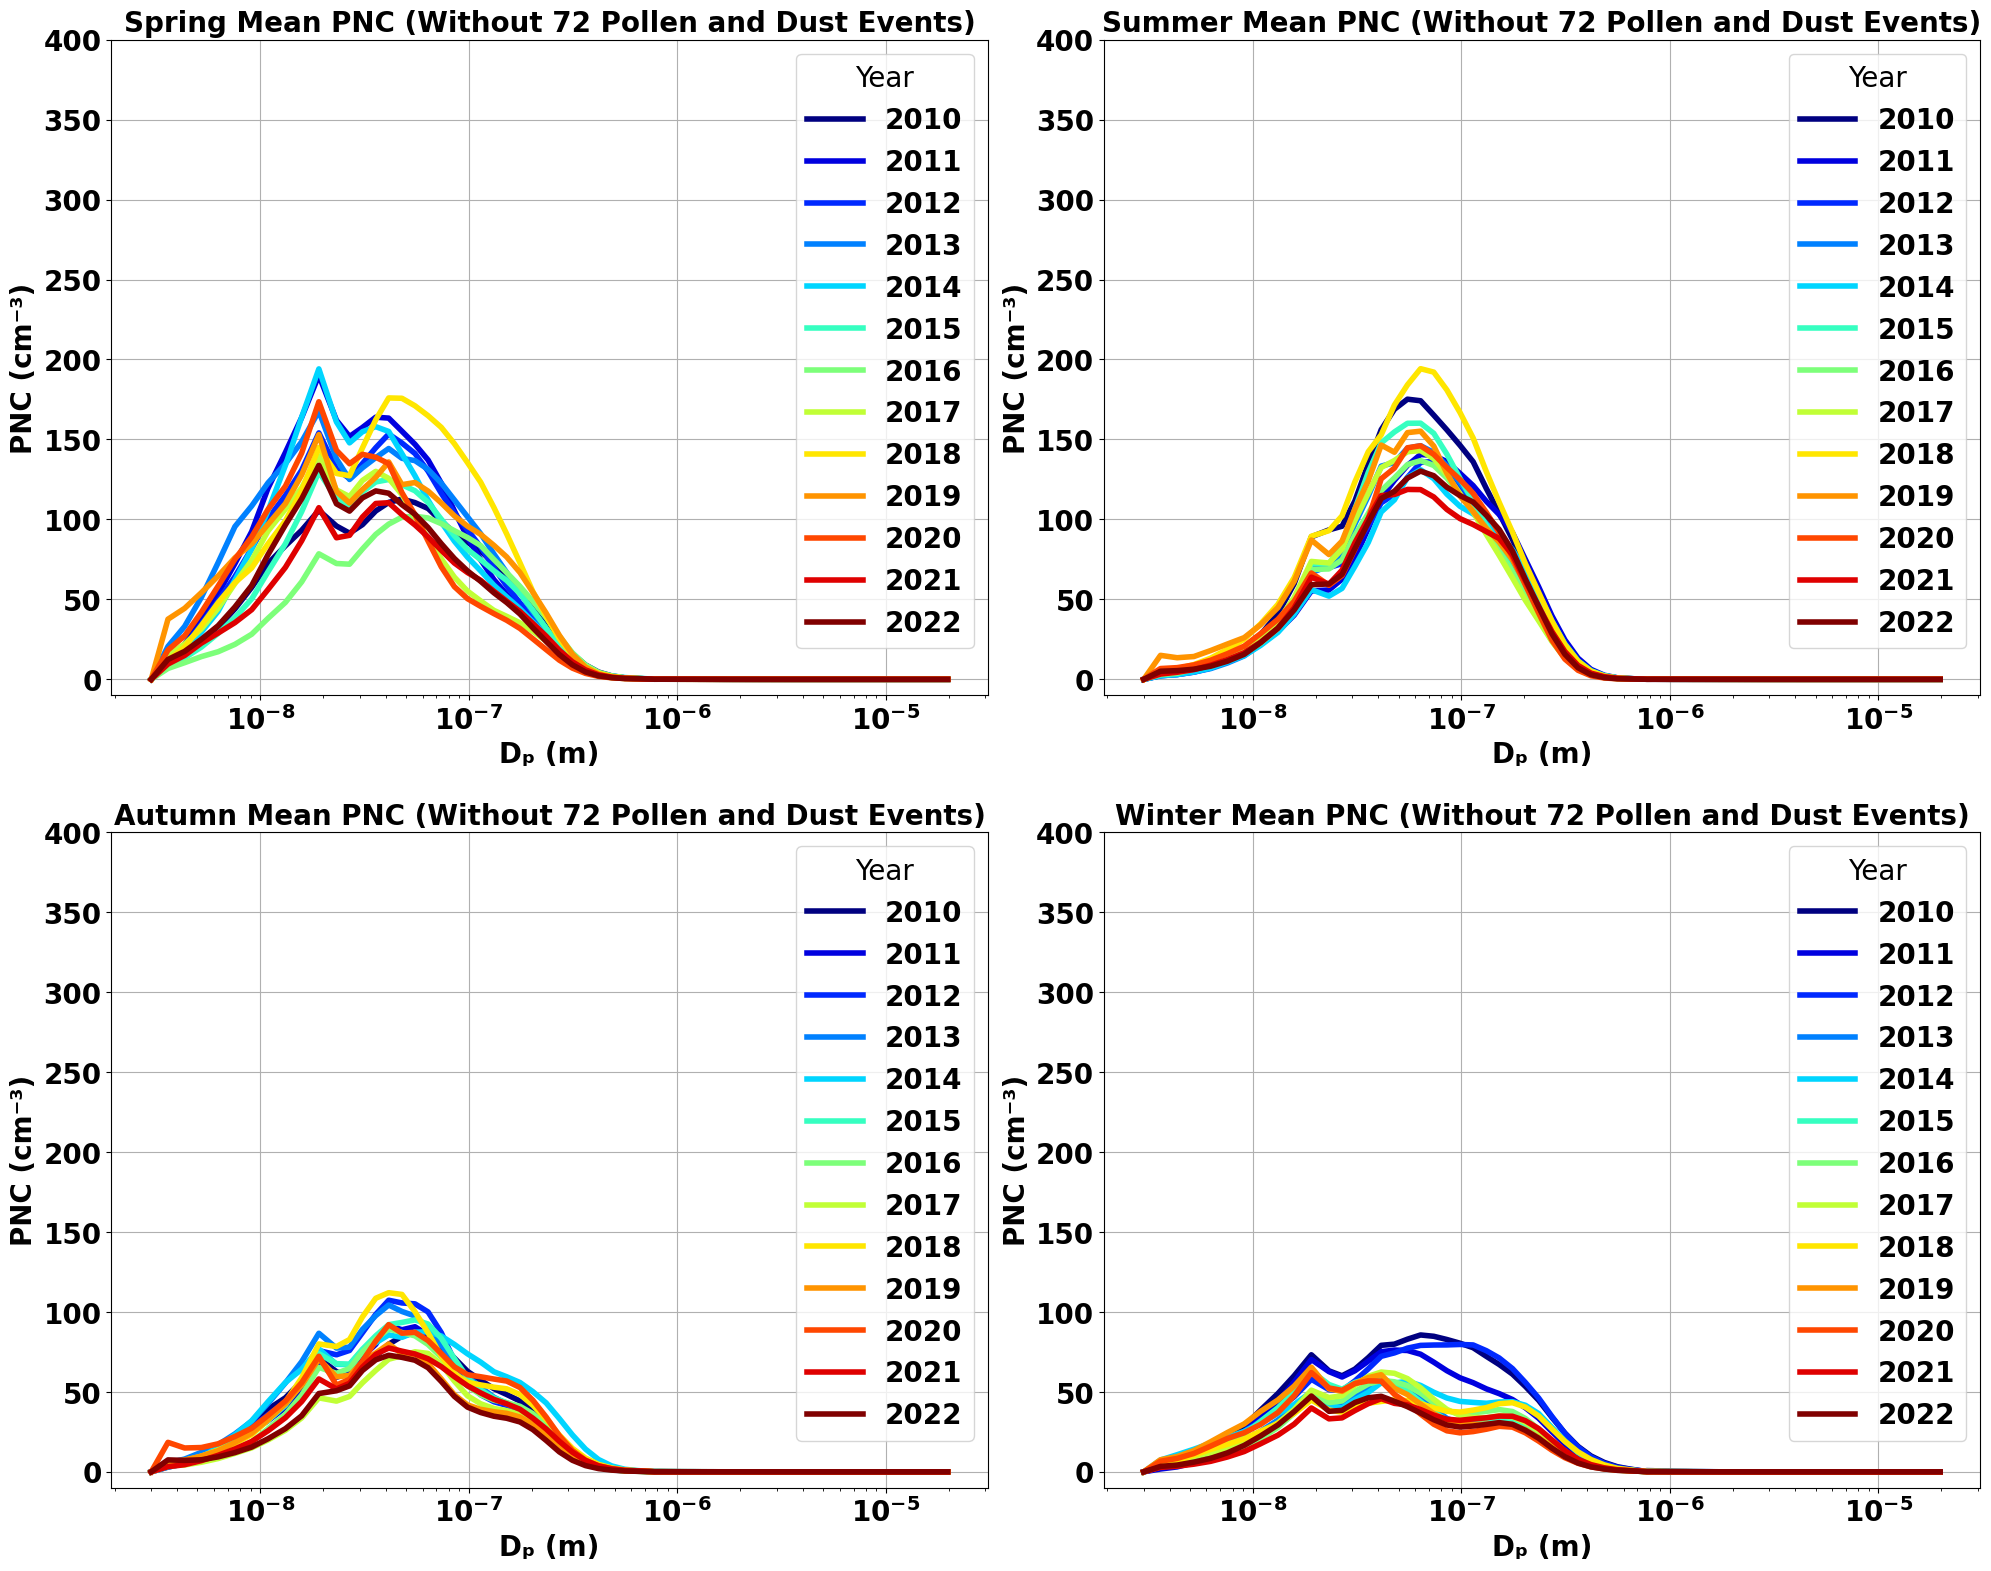

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_mean_psd_by_season(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'datetime' column is datetime type for easy manipulation
    data['datetime'] = pd.to_datetime(data['datetime'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'datetime' column
    diameters_float = [float(d) for d in diameters]

    # Define seasons
    seasons = {
        'Spring': (3, 4, 5),
        'Summer': (6, 7, 8),
        'Autumn': (9, 10, 11),
        'Winter': (12, 1, 2)
    }

    # Prepare a large figure to hold all subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration
    
    # Plot each season
    for i, (season, months) in enumerate(seasons.items()):
        season_data = data[data['datetime'].dt.month.isin(months) & data['datetime'].dt.year.between(2010, 2022)]
        years = sorted(season_data['datetime'].dt.year.unique())
        colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

        ax = axes[i]
        for year, color in zip(years, colors):
            yearly_data = season_data[season_data['datetime'].dt.year == year]
            yearly_data = yearly_data.dropna(subset=diameters)
            mean_psd = yearly_data.iloc[:, 1:].mean()

            # Plot mean PSD
            ax.semilogx(diameters_float, mean_psd, linewidth=4, color=color, label=str(year))

        # Set plot formatting
        ax.set_title(f'{season} Mean PNC (Without 72 Pollen and Dust Events)', fontsize=20, weight='bold')
        ax.set_xlabel('Dₚ (m)', fontsize=20, weight='bold')
        ax.set_ylabel('PNC (cm⁻³)', fontsize=20, weight='bold')
        ax.set_ylim(y_min, y_max)
        ax.grid(True)

        legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
        for text in legend.get_texts():
            text.set_weight('bold')

        ax.tick_params(axis='both', which='major', labelsize=20)
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight('bold')

        ax.xaxis.get_offset_text().set_fontsize(20)
        ax.xaxis.get_offset_text().set_weight('bold')
        ax.yaxis.get_offset_text().set_fontsize(20)
        ax.yaxis.get_offset_text().set_weight('bold')

    # Improve layout and display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/10. PNC Without 72 Pollen and dust events.xlsx'
y_min = -10   # Minimum y-axis value
y_max = 400  # Maximum y-axis value

plot_mean_psd_by_season(file_path, y_min, y_max)

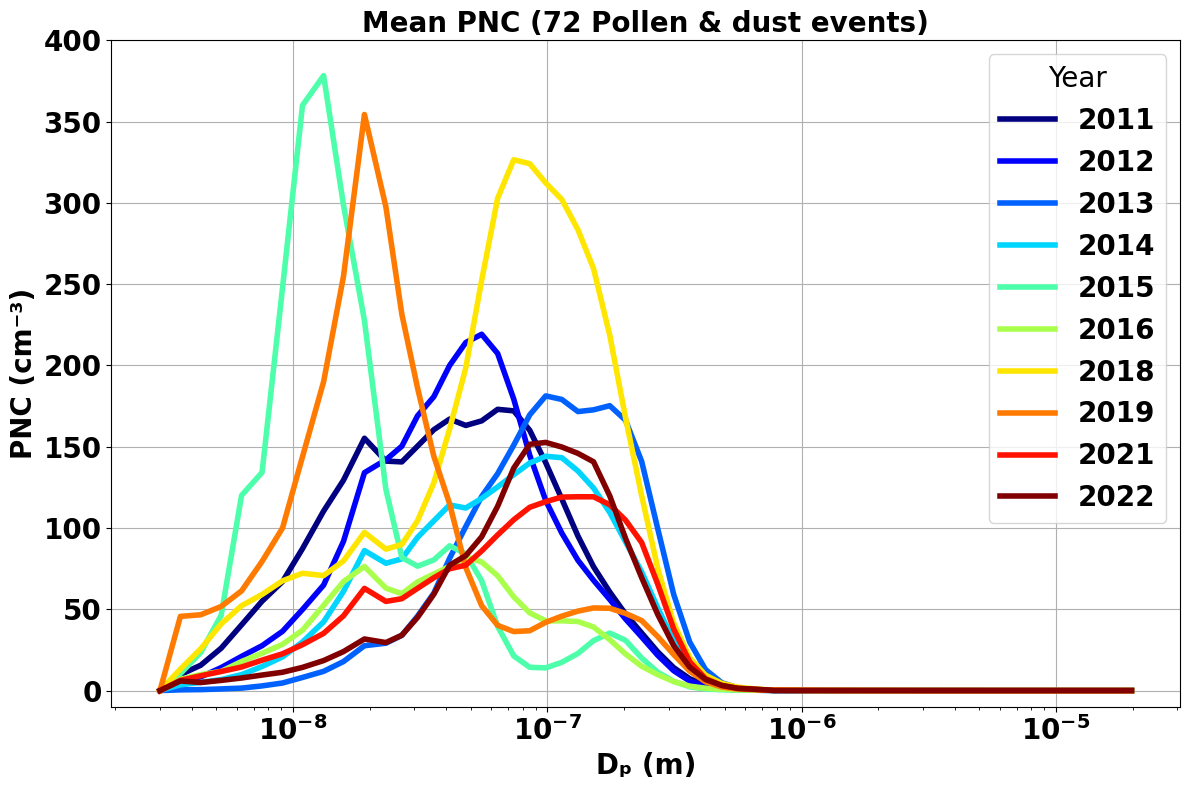

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_psd_by_years(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'Date' column is datetime type for easy manipulation
    data['datetime'] = pd.to_datetime(data['datetime'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'datetime' column
    diameters_float = [float(d) for d in diameters]

    # Filter data for years 2010 to 2022
    data = data[data['datetime'].dt.year.between(2010, 2022)]
    years = sorted(data['datetime'].dt.year.unique())

    # Prepare a figure
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

    # Plot data for each year using the mean
    for year, color in zip(years, colors):
        yearly_data = data[data['datetime'].dt.year == year]
        yearly_data = yearly_data.dropna(subset=diameters)
        mean_psd = yearly_data.iloc[:, 1:].mean()  # Use mean instead of sum
        
        ax.semilogx(diameters_float, mean_psd, linewidth=4, color=color, label=str(year))

    # Set plot titles and labels
    ax.set_title('Mean PNC (72 Pollen & dust events)', fontsize=20, weight='bold')
    ax.set_xlabel('Dₚ (m)', fontsize=20, weight='bold')
    ax.set_ylabel('PNC (cm⁻³)', fontsize=20, weight='bold')
    ax.set_ylim(y_min, y_max)
    ax.grid(True)
    legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
    for text in legend.get_texts():
        text.set_weight('bold')

    # Adjusting the tick labels and exponent notation
    ax.tick_params(axis='both', which='major', labelsize=20)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    # Set the offset text for scientific notation to be bold and size 20
    ax.xaxis.get_offset_text().set_fontsize(20)
    ax.xaxis.get_offset_text().set_weight('bold')
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.yaxis.get_offset_text().set_weight('bold')

    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Close the plot to free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/10. PNC 72 Pollen and dust events.xlsx'
y_min = -10  # Set minimum y-axis value
y_max = 400 # Set maximum y-axis value

plot_psd_by_years(file_path, y_min, y_max)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


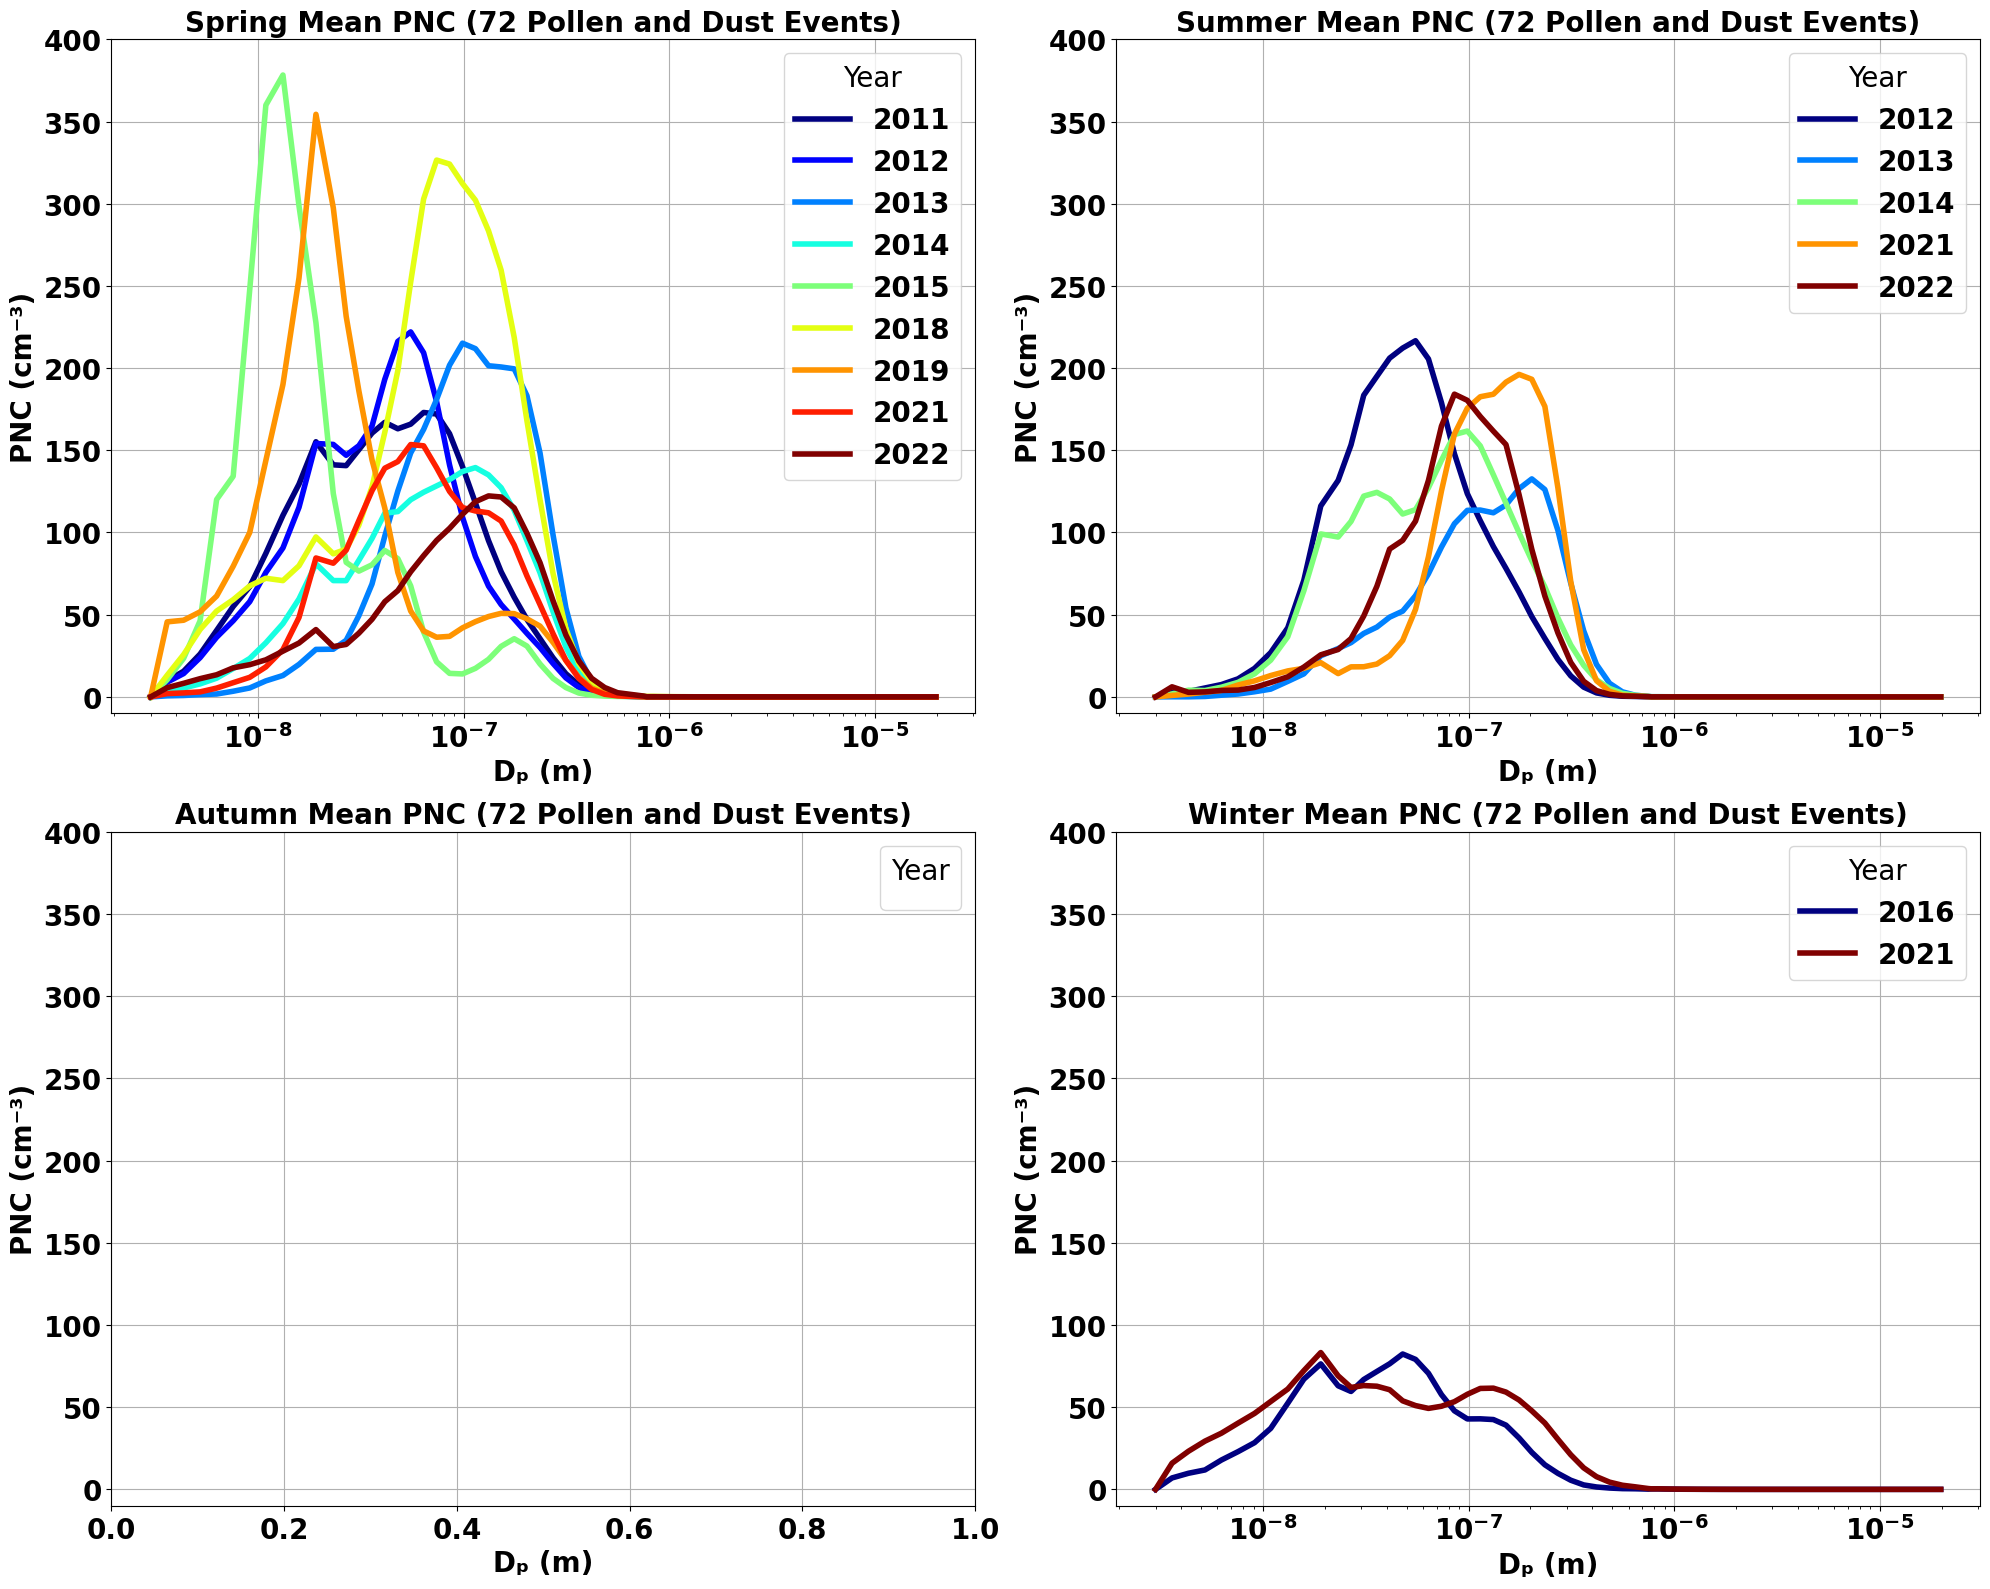

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_mean_psd_by_season(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'datetime' column is datetime type for easy manipulation
    data['datetime'] = pd.to_datetime(data['datetime'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'datetime' column
    diameters_float = [float(d) for d in diameters]

    # Define seasons
    seasons = {
        'Spring': (3, 4, 5),
        'Summer': (6, 7, 8),
        'Autumn': (9, 10, 11),
        'Winter': (12, 1, 2)
    }

    # Prepare a large figure to hold all subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration
    
    # Plot each season
    for i, (season, months) in enumerate(seasons.items()):
        season_data = data[data['datetime'].dt.month.isin(months) & data['datetime'].dt.year.between(2010, 2022)]
        years = sorted(season_data['datetime'].dt.year.unique())
        colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

        ax = axes[i]
        for year, color in zip(years, colors):
            yearly_data = season_data[season_data['datetime'].dt.year == year]
            yearly_data = yearly_data.dropna(subset=diameters)
            mean_psd = yearly_data.iloc[:, 1:].mean()

            # Plot mean PSD
            ax.semilogx(diameters_float, mean_psd, linewidth=4, color=color, label=str(year))

        # Set plot formatting
        ax.set_title(f'{season} Mean PNC (72 Pollen and Dust Events)', fontsize=20, weight='bold')
        ax.set_xlabel('Dₚ (m)', fontsize=20, weight='bold')
        ax.set_ylabel('PNC (cm⁻³)', fontsize=20, weight='bold')
        ax.set_ylim(y_min, y_max)
        ax.grid(True)

        legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
        for text in legend.get_texts():
            text.set_weight('bold')

        ax.tick_params(axis='both', which='major', labelsize=20)
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight('bold')

        ax.xaxis.get_offset_text().set_fontsize(20)
        ax.xaxis.get_offset_text().set_weight('bold')
        ax.yaxis.get_offset_text().set_fontsize(20)
        ax.yaxis.get_offset_text().set_weight('bold')

    # Improve layout and display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/10. PNC 72 Pollen and dust events.xlsx'
y_min = -10   # Minimum y-axis value
y_max = 400  # Maximum y-axis value

plot_mean_psd_by_season(file_path, y_min, y_max)